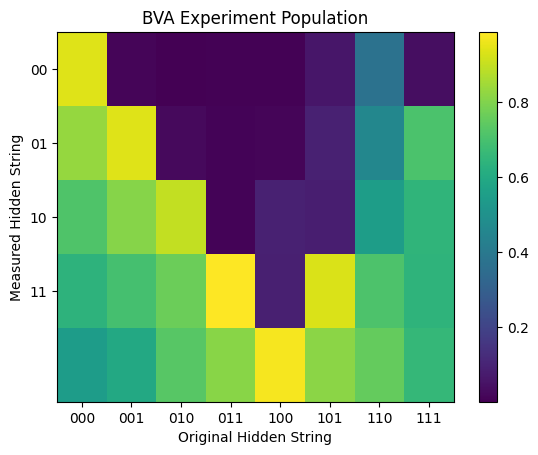

List of file paths (last line in each file):
000: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_046
001: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_047
010: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_048
011: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_049
100: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_050
101: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_054
110: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_057
111: Z:\Lab Data\Algorithms\Polyqubit_BVA\IonControl_raw_data_copied\2025\2025_04\2025_04_30\BVA_2_polyqubit_058


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def parse_population_line(line):
    """
    Parse a line like:
      [0.         1.         0.84848485 0.77777778 0.66666667]
    into a numpy array.
    """
    line = line.strip()
    # Remove surrounding brackets if present
    if line.startswith('[') and line.endswith(']'):
        line = line[1:-1]
    # Use numpy.fromstring to read numbers separated by whitespace.
    values = np.fromstring(line, sep=' ')
    return values

# Change the pattern/path as needed.
# For example, if your files are in the current directory:
# file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_2_polyqubit_hiddenstring_*_20250501_1326*"
file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_3_polyqubit_hiddenstring_*_20250430_1653*"
# file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_3_polyqubit_hiddenstring_*_20250514_1351*"
# file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_3_polyqubit_hiddenstring_*_20250514_1429*"

# file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_3_polyqubit_hiddenstring_*_20250514_1443*"
# file_pattern = "Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\BVA_logs\\BVA_3_polyqubit_hiddenstring_*_20250516_1544*"

files = glob.glob(file_pattern)

if not files:
    print("No files found with the pattern:", file_pattern)
    exit()

# Dictionary to store the population vector and file path keyed by original hidden string.
pop_data = {}
file_paths = {}

for filename in files:
    # Example filename: BVA_2_polyqubit_hiddenstring_00_20250324_1855
    base = os.path.basename(filename)
    parts = base.split('_')
    # Assuming the original hidden string is the part right after "hiddenstring"
    # e.g., parts = ["BVA", "2", "polyqubit", "hiddenstring", "00", "20250324", "1855"]
    try:
        idx = parts.index("hiddenstring")
        original_hidden = parts[idx + 1]
    except ValueError:
        print("Filename does not match expected pattern:", filename)
        continue

    # Read file lines
    with open(filename, 'r') as f:
        lines = f.readlines()

    if len(lines) < 2:
        print("File", filename, "does not have enough lines.")
        continue

    # The first line is the population vector.
    pop_vector = parse_population_line(lines[0])
    # The last line is assumed to be the file path.
    file_path_line = lines[-1].strip()

    pop_data[original_hidden] = pop_vector
    file_paths[original_hidden] = file_path_line

# Sort the data based on the original hidden string.
# We assume the hidden strings are binary numbers (e.g., '00', '01', '10', '11').
sorted_keys = sorted(pop_data.keys(), key=lambda x: int(x, 2))

# Build the matrix where each column is the population vector for an original hidden string.
# Each vector is assumed to contain 5 numbers: [bus, |00>, |01>, |10>, |11>]
matrix = np.column_stack([pop_data[k] for k in sorted_keys])

# Create an imshow plot
plt.figure()
im = plt.imshow(matrix, aspect='auto', interpolation='none')
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(sorted_keys)), labels=sorted_keys)
# Define y-axis labels: first entry is the bus state, followed by the two-qubit states.
measured_labels = ['00', '01', '10', '11']
# measured_labels = ['000', '001', '010', '011', '100', '101', '110', '111']
plt.yticks(ticks=np.arange(len(measured_labels)), labels=measured_labels)
plt.xlabel('Original Hidden String')
plt.ylabel('Measured Hidden String')
plt.title('BVA Experiment Population')
plt.show()

# Print the list of file paths corresponding to each original hidden string
print("List of file paths (last line in each file):")
for key in sorted_keys:
    print(f"{key}: {file_paths[key]}")


In [4]:
file_paths

{'000': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_046',
 '001': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_047',
 '010': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_048',
 '011': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_049',
 '100': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_050',
 '101': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_054',
 '110': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_polyqubit_057',
 '111': 'Z:\\Lab Data\\Algorithms\\Polyqubit_BVA\\IonControl_raw_data_copied\\2025\\2025_04\\2025_04_30\\BVA_2_

Total sorted data points: 9000
11.5
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
8.0
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
8.5
Threshold recalculated using histogram: 9.5
Total sorted data points: 9000
9.0
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
10.5
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
11.5
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
12.5
Threshold recalculated using histogram: 10.5
Total sorted data points: 9000
12.0
Threshold recalculated using histogram: 11.5
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.89655172 0.03752535 0.00709939 0.01217039 0.0030426  0.0030426
  0.03549696 0.00507099]
 [0.01435897 0.81230769 0.0174359  0.00615385 0

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (4).

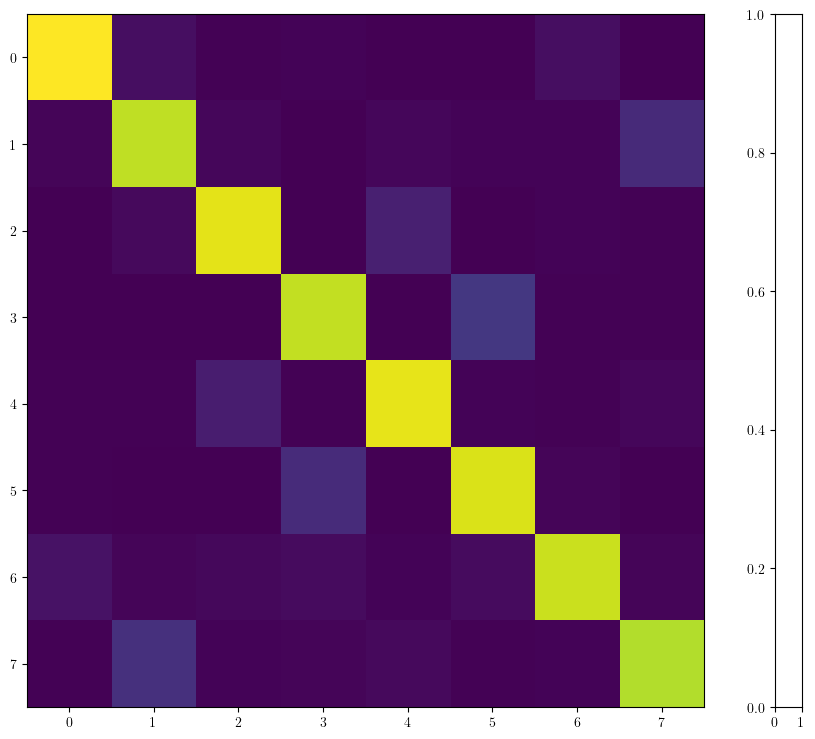

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True
import json
import os

def load_experiment_from_file(file_path):
    """
    Load experiments from a given file.
    
    Each text file is assumed to contain multiple experiments 
    (one JSON object per line, where each JSON is a list with a dictionary and key "0").
    
    Parameters:
        file_path: string, exact path to the file.
    
    Returns:
        A list of experiments. Each experiment is a list of counts.
    """
    experiments = []
    with open(file_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            # Assumes each line is a list with a dict containing key "0"
            experiments.append(data[0]["0"])
    return experiments

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    print("Total sorted data points:", len(data_sorted))
    # Remove extreme ends (if possible)
    if len(data_sorted) > 4000:
        data_sorted = data_sorted[2000:]
    if len(data_sorted) > 2000:
        step = round(data_sorted.size / (len(counts) * 0.00150167))
        if step < 1:
            step = 1
        data_sorted = data_sorted[0:-1:step]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    print(threshold)
    # # New logic: if the calculated threshold is less than 2, recalculate using histogram data.
    # if threshold < 4 or threshold > 20:
        # Calculate histogram in the x-range 4 to 30
    hist_counts, bin_edges = np.histogram(counts, bins=range(4, 31))
    # Find the bin (lowest bar) with the minimum count in that range
    min_bin_index = np.argmin(hist_counts[:])
    # Use the lower edge of that bin as the threshold
    threshold = bin_edges[min_bin_index] + 0.5
    print(f"Threshold recalculated using histogram: {threshold}")
    
    return threshold, data_sorted
data_files = file_paths
keys_list = list(data_files.keys())
num_kets = len(keys_list)

ket_avg_list = [None] * num_kets   # Average trigger vector (before removing first column)
ket_data_rate  = [0] * num_kets     # Data rate for each ket (fraction of experiments with valid trigger)
thresholds_info = [None] * num_kets  # For each ket: (flat_data, threshold, key)

analysis_mode = 'all'  # (unused now; we load each file directly)

# Loop over the dictionary entries
for i, key in enumerate(keys_list):
    file_path = data_files[key]
    experiments = load_experiment_from_file(file_path)
    if len(experiments) == 0:
        print(f'No data found for key {key}. Marking as invalid.')
        continue

    experiments = np.array(experiments)  # Shape: (num_experiments, experiment_length)
    flat_data = experiments.ravel()

    # Compute threshold and store for histogram plotting
    try:
        threshold, _ = getShelvingThreshold(flat_data)
    except Exception as e:
        print(f'Error computing threshold for key {key}: {e}')
        threshold = None
    thresholds_info[i] = (flat_data, threshold, key)

    # Create boolean matrix: mark True if count > 11 (you could also use experiments > threshold)
    bool_matrix = experiments > threshold
    # For each experiment (row), mark the first index where condition is met (if not starting at 0)
    result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
    for row_index in range(bool_matrix.shape[0]):
        true_indices = np.where(bool_matrix[row_index, :])[0]
        if true_indices.size > 0 and true_indices[0] != 0:#and true_indices[0] != 1 :
            result_matrix[row_index, true_indices[0]] = True

    # Filter out experiments that never triggered the condition
    valid_rows = result_matrix.any(axis=1)
    filtered = result_matrix[valid_rows]
    data_rate = filtered.shape[0] / experiments.shape[0]
    ket_data_rate[i] = data_rate
    # print(filtered)
    if filtered.shape[0] > 0:
        avg_vector = np.mean(filtered, axis=0)
        ket_avg_list[i] = avg_vector
    else:
        print(f'No valid trigger data for key {key}.')
        ket_avg_list[i] = None
        ket_data_rate[i] = 0

# Determine measurement dimension (after removing first column) from first valid ket.
measurement_dim = None
for vec in ket_avg_list:
    if vec is not None and len(vec) > 1:
        measurement_dim = len(vec) - 1
        break
if measurement_dim is None:
    # Fall back to using the number of keys (i.e. a square matrix) if no valid data is found.
    measurement_dim = num_kets

# Build full data matrix with one row per prepared state (key).
# For valid keys, use avg_vector[1:]; for invalid, fill with zeros.
data_matrix = np.zeros((num_kets, measurement_dim))
print(data_matrix)
for i in range(num_kets):
    if ket_avg_list[i] is not None and len(ket_avg_list[i]) > 1:
        vec = ket_avg_list[i][1:]
        if len(vec) >= measurement_dim:
            data_matrix[i, :] = vec[:measurement_dim]
        else:
            data_matrix[i, :len(vec)] = vec
    # else: remains zeros

# Compute fidelity and data rate averages from only valid keys.
valid_fidelity_list = []
valid_data_rate_list = []
for i in range(num_kets):
    if ket_avg_list[i] is not None:
        # For fidelity, mimic your original: use the diagonal element.
        # If i < measurement_dim, use data_matrix[i, i]; otherwise use the last element.
        if i < measurement_dim:
            fidelity = data_matrix[i, i]
        else:
            fidelity = data_matrix[i, -1]
        valid_fidelity_list.append(fidelity)
        if ket_data_rate[i] > 0:
            valid_data_rate_list.append(ket_data_rate[i])

avg_fidelity = np.mean(valid_fidelity_list) if valid_fidelity_list else np.nan
avg_data_rate = np.mean(valid_data_rate_list) if valid_data_rate_list else np.nan

fig, (ax_main, ax_side) = plt.subplots(1, 2, 
                                         gridspec_kw={'width_ratios': [25, 1]}, 
                                         figsize=(10, 9))
cmap = plt.get_cmap("viridis")
num_prepared = num_kets   # one row per prepared state (dictionary key)
num_measured = measurement_dim
print(data_matrix)
print(np.mean(np.diag(data_matrix)))
im = ax_main.imshow(data_matrix, cmap=cmap, aspect='auto')
# Use the keys for both axes labels
tick_labels = [f'$|{key}\\rangle$' for key in keys_list]
measured_keys = ['000', '001', '010', '011', '100', '101', '110', '111']
measured_keys = ['00', '01', '10', '11']
x_tick_labels = [f'$|{key}\\rangle$' for key in measured_keys]
print(x_tick_labels)
ax_main.set_xticks(np.arange(num_measured))
# In case measurement_dim equals number of keys:
ax_main.set_xticklabels(x_tick_labels, fontsize=24, rotation=0)
ax_main.set_yticks(np.arange(num_prepared))
ax_main.set_yticklabels(tick_labels, fontsize=24)
ax_main.invert_yaxis()
ax_main.set_xlabel('Measured String', fontsize=16)
ax_main.set_ylabel('Hidden String', fontsize=16)

# Annotate each cell with its percentage value.
for i in range(num_prepared):
    if ket_avg_list[i] is None:
        ax_main.text(num_measured/2, i, 'No Valid Data', ha='center', va='center', 
                     color='red', fontsize=12, fontweight='bold')
    else:
        for j in range(num_measured):
            if data_matrix[i, j] > 0.05:
                ax_main.text(j, i, rf'\textbf{{{data_matrix[i, j] * 100:.1f}}}', ha='center', va='center',
                             color='black' if data_matrix[i, j] > 0.5 else 'white', fontsize=42)

ax_main.set_title(r'\textbf{BVA result on 3 Poly Qubit}', fontsize=20)

# Add grid lines
for x in np.arange(-0.5, num_measured, 1):
    ax_main.axvline(x, color='gray', linestyle='-', linewidth=0.5)
for y in np.arange(-0.5, num_prepared, 1):
    ax_main.axhline(y, color='gray', linestyle='-', linewidth=0.5)

# # Side plot for data rate (one row per prepared state)
# side_data = np.array(ket_data_rate).reshape(num_prepared, 1)
# im_side = ax_side.imshow(side_data, cmap='viridis', aspect='auto', vmin=0, vmax=1)
# ax_side.yaxis.set_label_position("right")
# ax_side.yaxis.tick_right()
# ax_side.set_yticks(np.arange(num_prepared))
# ax_side.set_yticklabels(tick_labels, fontsize=12)
# ax_side.set_xticks([])
# ax_side.invert_yaxis()
# ax_side.set_ylabel('Data rate',fontsize=15)
# for i in range(num_prepared):
#     ax_side.text(0, i, rf'\textbf{{{str(np.round(ket_data_rate[i] * 100,1))}\%}}', ha='center', va='center', color='black', fontsize=12)


plt.tight_layout()
plt.savefig(f'3_poly_qubit_BVA.svg')
plt.show()

# # ===== HISTOGRAM PLOTS FOR THRESHOLDS =====
# fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# axs = axs.flatten()

# for idx in range(8):
#     ax = axs[idx]
#     info = thresholds_info[idx]
#     if info is not None and info[1] is not None:
#         flat_data, threshold, key = info
#         bins = int(max(flat_data)) if max(flat_data) > 0 else 10
#         ax.hist(flat_data, bins=bins, color='blue', alpha=0.7)
#         # Plot vertical line at threshold
#         ax.axvline(threshold, color='red', linestyle='--', label=f'Th={threshold:.2f}')
#         ax.set_title(f'Key {key}', fontsize=10)
#         ax.set_yscale('log')
#         ax.legend(fontsize=8)
#     else:
#         ax.text(0.5, 0.5, 'No Valid Data', ha='center', va='center', color='red', fontsize=12)
#         ax.set_xticks([])
#         ax.set_yticks([])
    
# Turn off any unused subplots
# for idx in range(num_kets, 25):
#     axs[idx].axis('off')
    
# plt.tight_layout()
# plt.show()


In [46]:
%matplotlib widget

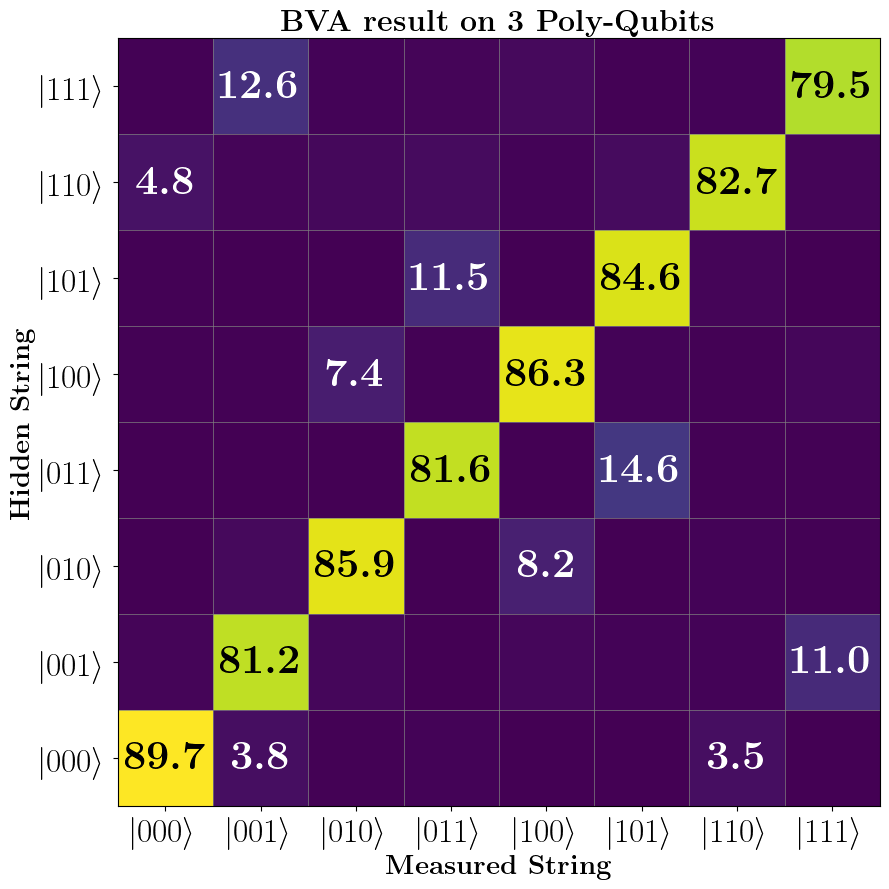

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import json

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

def load_experiment_from_file(path):
    exp = []
    with open(path, 'r') as f:
        for ln in f:
            exp.append(json.loads(ln)[0]["0"])
    return exp

def getShelvingThreshold(counts):
    ds = np.sort(counts, axis=None)
    if len(ds) > 4000:
        ds = ds[2000:]
    if len(ds) > 2000:
        st = round(ds.size / (len(counts) * 0.00150167))
        st = 1 if st < 1 else st
        ds = ds[0:-1:st]
    dsd = ds[1:-1] - ds[0:-2]
    th = max(dsd) / 2 + ds[np.argmax(dsd)]
    hc, be = np.histogram(counts, bins=range(4, 31))
    th = be[np.argmin(hc)] + 0.5
    return th, ds

keys = list(file_paths.keys())
n_kets = len(keys)
ket_avg = [None] * n_kets
ket_dr  = [0]    * n_kets
thr_inf = [None] * n_kets

for i, k in enumerate(keys):
    exps = load_experiment_from_file(file_paths[k])
    if len(exps) == 0:
        continue
    exps = np.array(exps)
    flat = exps.ravel()
    try:
        th, _ = getShelvingThreshold(flat)
    except:
        th = None
    thr_inf[i] = (flat, th, k)
    bm = exps > th
    res = np.full(bm.shape, False, dtype=bool)
    for r in range(bm.shape[0]):
        ti = np.where(bm[r])[0]
        if ti.size > 0 and ti[0] != 0:
            res[r, ti[0]] = True
    vr = res.any(axis=1)
    filt = res[vr]
    ket_dr[i] = filt.shape[0] / exps.shape[0]
    if filt.shape[0] > 0:
        ket_avg[i] = np.mean(filt, axis=0)

meas_dim = next((len(v) - 1 for v in ket_avg if v is not None and len(v) > 1), n_kets)
data_m = np.zeros((n_kets, meas_dim))
for i in range(n_kets):
    if ket_avg[i] is not None and len(ket_avg[i]) > 1:
        vec = ket_avg[i][1:]
        data_m[i, :len(vec)] = vec[:meas_dim]

fid = [data_m[i, i] if i < meas_dim else data_m[i, -1] for i in range(n_kets) if ket_avg[i] is not None]
dr  = [ket_dr[i] for i in range(n_kets) if ket_dr[i] > 0]
avg_fid = np.mean(fid) if fid else np.nan
avg_dr  = np.mean(dr)  if dr  else np.nan

fig, ax = plt.subplots(figsize=(9, 9))
cmap = plt.get_cmap("viridis")
im = ax.imshow(data_m, cmap=cmap, aspect='auto')
tick_lbls = [f'$|{k}\\rangle$' for k in keys]
measured_keys = ['000', '001', '010', '011', '100', '101', '110', '111']
# measured_keys = ['00', '01', '10', '11']
meas_lbls = [f'$|{k}\\rangle$' for k in measured_keys]
ax.set_xticks(np.arange(meas_dim))
ax.set_xticklabels(meas_lbls, fontsize=24)
ax.set_yticks(np.arange(n_kets))
ax.set_yticklabels(tick_lbls, fontsize=24)
ax.invert_yaxis()
ax.set_xlabel(r'\textbf{Measured String}', fontsize=20)
ax.set_ylabel(r'\textbf{Hidden String}', fontsize=20)

for i in range(n_kets):
    if ket_avg[i] is None:
        ax.text(meas_dim/2, i, r'\textbf{No Valid Data}', ha='center', va='center', color='red', fontsize=14)
    else:
        for j in range(meas_dim):
            if data_m[i, j] > 0.035:
                ax.text(j, i, rf'\textbf{{{data_m[i, j]*100:.1f}}}', ha='center', va='center',
                        color='black' if data_m[i, j] > 0.5 else 'white', fontsize=30)

for x in np.arange(-0.5, meas_dim, 1):
    ax.axvline(x, color='gray', linewidth=0.5)
for y in np.arange(-0.5, n_kets, 1):
    ax.axhline(y, color='gray', linewidth=0.5)

ax.set_title(r'\textbf{BVA result on 3 Poly-Qubits}', fontsize=22)
plt.tight_layout()
plt.savefig('3_poly_qubit_BVA.svg')
plt.show()


In [23]:
np.mean(np.diag(data_m))

0.8394053694564522